In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()

#---------------------------------------
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 1024
P = 256
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 10

inp = tf.placeholder(shape=(None, M), dtype=tf.float32)
out = tf.placeholder(shape=(None, T), dtype=tf.float32)

weights1 = tf.Variable(tf.truncated_normal([M, O], stddev=np.sqrt(1/M)))
bias1 = tf.Variable(tf.ones([O])/O)
layer1 = tf.nn.relu(tf.matmul(inp, weights1) + bias1)

weights2 = tf.Variable(tf.truncated_normal([O, P], stddev=np.sqrt(1/O)))
bias2 = tf.Variable(tf.ones([P])/P)
layer2 = tf.nn.relu(tf.matmul(layer1, weights2) + bias2)

weights_output = tf.Variable(tf.truncated_normal([P, T], stddev=np.sqrt(1/P)))
bias_output = tf.Variable(tf.ones([T])/T)
evidence = tf.matmul(layer2, weights_output) + bias_output
output = tf.nn.softmax(evidence)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=evidence, labels= out)
cross_entropy = tf.reduce_mean(cross_entropy)

train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("Cost", cross_entropy)
tf.summary.scalar("Accuracy", accuracy)
summary_op = tf.summary.merge_all()

with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(training_epochs):
            print("Epoch: ", epoch)
            batch_count = int(N/batch_size)
            for i in range(batch_count):
                start, finish = batch_size*i, batch_size*(i+1)
                batch_x, batch_y = x_train[start:finish, :], y_train[start:finish, :]
                d = {inp: batch_x, out: batch_y}
                _, summary = sess.run([train_step, summary_op], feed_dict=d)
        print("Accuracy", accuracy.eval(feed_dict={inp: x_test, out: y_test}))

Using TensorFlow backend.


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Accuracy 0.89246154


In [4]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 1024
P = 256
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 10

model = Sequential()
model.add(Dense(P, activation='relu'))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/10
65000/65000 [==============================] - 20s 309us/step - loss: 0.9816 - acc: 0.7166
Epoch 2/10
65000/65000 [==============================] - 16s 240us/step - loss: 0.5630 - acc: 0.8308
Epoch 3/10
65000/65000 [==============================] - 16s 252us/step - loss: 0.4441 - acc: 0.8638
Epoch 4/10
65000/65000 [==============================] - 19s 296us/step - loss: 0.3814 - acc: 0.8804
Epoch 5/10
65000/65000 [==============================] - 20s 307us/step - loss: 0.3416 - acc: 0.8931
Epoch 6/10
65000/65000 [==============================] - 23s 359us/step - loss: 0.3138 - acc: 0.8997
Epoch 7/10
65000/65000 [==============================] - 25s 390us/step - loss: 0.2912 - acc: 0.9063
Epoch 8/10
65000/65000 [==============================] - 26s 404us/step - loss: 0.2739 - acc: 0.9123
Epoch 9/10
65000/65000 [==============================] - 28s 438us/step - loss: 0.2572 - acc: 0.9171
Epoch 10/10
13000/13000 [==============================] - 4s 286us/step
[0.398614

In [5]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 2048
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 10

model = Sequential()
model.add(Dense(P, activation='relu'))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/10
65000/65000 [==============================] - 24s 370us/step - loss: 0.9164 - acc: 0.7301
Epoch 2/10
65000/65000 [==============================] - 23s 355us/step - loss: 0.5151 - acc: 0.8427
Epoch 3/10
65000/65000 [==============================] - 26s 407us/step - loss: 0.4175 - acc: 0.8714
Epoch 4/10
65000/65000 [==============================] - 30s 458us/step - loss: 0.3707 - acc: 0.8835
Epoch 5/10
65000/65000 [==============================] - 33s 505us/step - loss: 0.3399 - acc: 0.8933
Epoch 6/10
65000/65000 [==============================] - 35s 531us/step - loss: 0.3155 - acc: 0.8994
Epoch 7/10
65000/65000 [==============================] - 38s 581us/step - loss: 0.2935 - acc: 0.9065
Epoch 8/10
65000/65000 [==============================] - 87s 1ms/step - loss: 0.2759 - acc: 0.9112
Epoch 9/10
65000/65000 [==============================] - 75s 1ms/step - loss: 0.2537 - acc: 0.9172
Epoch 10/10
13000/13000 [==============================] - 5s 361us/step
[0.4834602659

Using TensorFlow backend.


Epoch 1/10
65000/65000 [==============================] - 31s 483us/step - loss: 0.9184 - acc: 0.7272
Epoch 2/10
65000/65000 [==============================] - 23s 353us/step - loss: 0.5172 - acc: 0.8427
Epoch 3/10
65000/65000 [==============================] - 24s 373us/step - loss: 0.4217 - acc: 0.8694
Epoch 4/10
65000/65000 [==============================] - 27s 409us/step - loss: 0.3735 - acc: 0.8826
Epoch 5/10
65000/65000 [==============================] - 30s 456us/step - loss: 0.3430 - acc: 0.8913
Epoch 6/10
65000/65000 [==============================] - 30s 460us/step - loss: 0.3253 - acc: 0.8972
Epoch 7/10
65000/65000 [==============================] - 28s 437us/step - loss: 0.3081 - acc: 0.9028
Epoch 8/10
65000/65000 [==============================] - 31s 484us/step - loss: 0.2924 - acc: 0.9072
Epoch 9/10
65000/65000 [==============================] - 30s 467us/step - loss: 0.2790 - acc: 0.9111
Epoch 10/10
13000/13000 [==============================] - 3s 240us/step
[0.499440

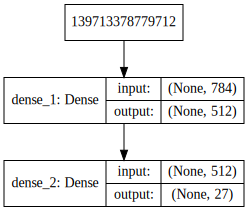

In [1]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 1024
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 10

model = Sequential()
model.add(Dense(P, activation='relu'))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))
#пакеты: graphviz, pydot

In [2]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 2048
P = 512
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 10

from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor = 'loss')
tensorboard = TensorBoard(log_dir = './logs', write_graph = True)

model = Sequential()
model.add(Dense(P, activation='relu'))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size, callbacks = [early_stopping, tensorboard])
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/10
65000/65000 [==============================] - 25s 383us/step - loss: 0.8939 - acc: 0.7385
Epoch 2/10
65000/65000 [==============================] - 23s 351us/step - loss: 0.4905 - acc: 0.8499
Epoch 3/10
65000/65000 [==============================] - 25s 379us/step - loss: 0.3852 - acc: 0.8797
Epoch 4/10
65000/65000 [==============================] - 25s 390us/step - loss: 0.3301 - acc: 0.8961
Epoch 5/10
65000/65000 [==============================] - 28s 429us/step - loss: 0.2941 - acc: 0.9059
Epoch 6/10
65000/65000 [==============================] - 30s 455us/step - loss: 0.2642 - acc: 0.9136
Epoch 7/10
65000/65000 [==============================] - 32s 490us/step - loss: 0.2404 - acc: 0.9214
Epoch 8/10
65000/65000 [==============================] - 34s 531us/step - loss: 0.2200 - acc: 0.9260
Epoch 9/10
65000/65000 [==============================] - 37s 562us/step - loss: 0.2034 - acc: 0.9313
Epoch 10/10
13000/13000 [==============================] - 4s 275us/step
[0.428450

In [7]:
!tensorboard --logdir=./logs

TensorBoard 1.12.0 at http://localhost.localdomain:6006 (Press CTRL+C to quit)
^C


In [17]:
import numpy as np
import tensorflow as tf

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
train = pd.read_csv('train.csv', header = None)

y_train = train.iloc[:, 0:1].copy()
x_train = train.iloc[:, 1:785].copy()

test = pd.read_csv('test.csv', header = None)

y_test = test.iloc[:, 0:1].copy()
x_test = test.iloc[:, 1:785].copy()


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.values.reshape((-1, 784))
x_test = x_test.values.reshape((-1, 784))

N, M = x_train.shape
O = 2048
O1 = 1024
P = 512
P1 = 256
T = 27
batch_size = 100
learning_rate = 0.001
training_epochs = 10

from keras.callbacks import EarlyStopping, TensorBoard
early_stopping = EarlyStopping(monitor = 'loss')
tensorboard = TensorBoard(log_dir = './logs', write_graph = True)

model = Sequential()
model.add(Dense(O1, activation='relu'))
model.add(Dense(P, activation='relu'))
model.add(Dense(P1, activation='relu'))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size, callbacks = [early_stopping, tensorboard])
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/10
65000/65000 [==============================] - 74s 1ms/step - loss: 0.8602 - acc: 0.7587
Epoch 2/10
13000/13000 [==============================] - 8s 620us/step
[10.334112064655011, 0.34884615586354184]
